# SALES ANALYSIS AND VISUALIZATIONS

INTRODUCTION:
Sales are the backbone of every flourishing company in the business sector. A fundamental metric of a company's performance is its capacity for generating income and raising profitability. High sales volume alone, however, is insufficient. It's crucial to make a thorough study of a company's sales data to determine how well it is doing. The market trends, consumer behavior, and areas for development can all be better understood through this analysis. We'll see the value of sales analysis in this article, along with how it may assist companies in making wise decisions and growing more successfully.

PROJECT STATEMENT:
I've been given access to a store's 2019 sales data, and I'm required to draw insightful conclusions from the information and make helpful recommendations for boosting sales. The information is shown in a folder that includes columns for "order id," "Product," "Quantity Ordered," "Price Each," "Order Date," and "Purchase Address" for each of the 12 months of the year's purchases.

AIM:
I am to locate the state that had the highest sale as well as every customer-desired item, best-selling moments (in hours and months of the year), the relationship between order rate and sales of each product, and items ordered together in order to avoid losing sales due to the unavailability of an item or items in the customer package. I also created a Power BI dashboard.






# Importing important libraries needed for the Project

In [3]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt
import os
import glob 



In [4]:
path = './Documents/Sales_Data'
directories = [d for d in os.listdir(path) ]
print(directories)

['Sales_April_2019.csv', 'Sales_August_2019.csv', 'Sales_December_2019.csv', 'Sales_February_2019.csv', 'Sales_January_2019.csv', 'Sales_July_2019.csv', 'Sales_June_2019.csv', 'Sales_March_2019.csv', 'Sales_May_2019.csv', 'Sales_November_2019.csv', 'Sales_October_2019.csv', 'Sales_September_2019.csv']


In [5]:
all_files = glob.glob('./Documents/Sales_Data/*.csv' )

df_list = []
for file in all_files:
    df_list.append(pd.read_csv(file))

merged_df = pd.concat(df_list, axis=0)

merged_df.to_csv("./Documents/combined.csv", index = False)
merged_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


The different CSV files located in the "path" above were all combined into one file using the "glob" library, then I iterate through the files, appended them into a list the concatenate them, before converting them to a CSV file.

I imported the merged CSV file, and gave it a variable name "combined_df"


In [6]:
combined_df=pd.read_csv("./Documents/combined.csv")


# cleaning the data to be able to obtain some informations


I cleaned up the data by removing any rows with blank cells, after which I made a "Months" column by slicing the first two characters from the "Order Date" column.

I ran into a problem because when using "glob" to merge files, it also includes the column names of each file as rows in the combined file, which resulted in rows where the value of columns like "Months" was "Or" because it was also slicing the "Or" in "Order Date". Therefore I simply removed all rows from the dataset where "Months" equals "Or," filtering the data.

I changed the month column from having numbers to having letters using the replace function.

Next, I changed each column's data type to match its right data type (because they came as strings by default).

Then use "describe" to get information on the numerical column.

In [7]:

combined_df=combined_df.dropna(how= 'any')

combined_df["Months"]= combined_df["Order Date"].str[:2]
dict= {"01":"Jan", "02" :"Feb", "03": "Mar","04": "Apr","05": "May","06": "Jun",
      "07": "Jul","08": "Aug","09": "Sep", "10": "Oct","11": "Nov","12": "Dec"}
combined_df['Months'] = combined_df['Months'].replace(dict, regex=True)

combined_df = combined_df[combined_df['Months'].str[:2] != 'Or']


combined_df = combined_df.astype({'Price Each':float,'Quantity Ordered': int})
combined_df.describe()

,Quantity Ordered,Price Each
count,185950.000000,185950.000000
mean,1.124383,184.399735
std,0.442793,332.731330
min,1.000000,2.990000
25%,1.000000,11.950000
50%,1.000000,14.950000
75%,1.000000,150.000000
max,9.000000,1700.000000


# obtaining month with highest sale and its total sale

I created a new column "Total_Sale" which is the multiplication of the product individual price "Price Each" and "Quantity Ordered".

In [11]:
combined_df["Total_Sale"] = combined_df["Price Each"]* combined_df["Quantity Ordered"]
combined_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Months,Total_Sale
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",Apr,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",Apr,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",Apr,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",Apr,11.99


Using the "groupby" method I got the sum of the total sale made each month, then converted the resulting series back to a data frame so I can have a plot with labels. Then I sorted in terms of increasing sales by months.

<function matplotlib.pyplot.show(close=None, block=None)>

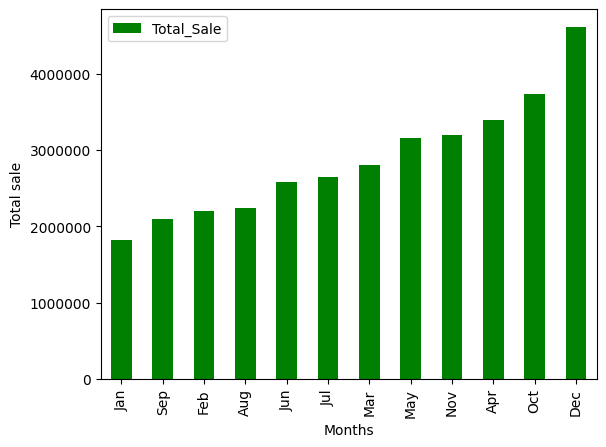

In [13]:
total_sale = combined_df.groupby('Months')['Total_Sale'].sum()
total_sale_df = total_sale.to_frame(name='Total_Sale')
result =total_sale_df.sort_values('Total_Sale', axis = 0,ascending= True)
result["Months"]= result.index

ax=result.plot.bar(x= "Months", y= "Total_Sale",
               color = "green")
ax.yaxis.set_major_formatter('{x:.0f}')
ax.set_xlabel("Months")
ax.set_ylabel("Total sale")
plt.show

As seen in the visualization above, December is the month with the most sales. This may be because it coincides with the holiday season. As a result, it is essential that the store maintain enough stock levels and that its distribution system is effective throughout this time.

# what city had the highest sale

Using the "apply" function, I added a city column from the "purchase address" field.
To distinguish between cities like "Portland," which is located in two separate states, I've included the state abbreviations after each city name.


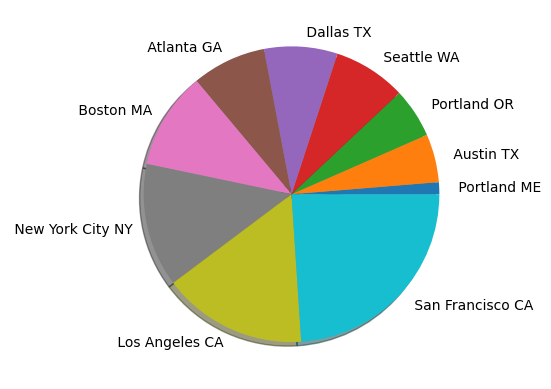

In [11]:
combined_df["City"]=combined_df["Purchase Address"].apply(lambda x: x.split(",")[1]+ " "+ x.split(",")[2].split(" ")[1])
answer= combined_df.groupby("City")["Total_Sale"].sum()
answer_df= answer.to_frame(name="Total_Sale")
sort = answer_df.sort_values("Total_Sale", axis = 0)
sort["city"]= sort.index

plt.pie(sort["Total_Sale"], labels= sort["city"], shadow =True)

plt.show()


"San Francisco Ca", had the highest sales in 2019, followed by "Los Angeles Ca", and "New York City NY". As a result, the store should focus on improving its client retention strategies in these cities before expanding its advertising efforts in other cities.

# Obtaining perfect time in a day to display advert for maximum sales

I created an hour column from the "order date" column by converting it to date-time format, which allowed me to plot it against the "Total Sale" value. 

<function matplotlib.pyplot.show(close=None, block=None)>

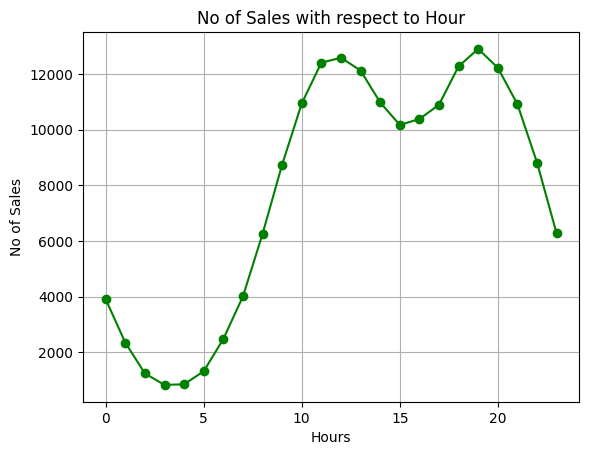

In [13]:
combined_df["Order Date"]=pd.to_datetime(combined_df["Order Date"])
combined_df["Hour"]= combined_df['Order Date'].dt.hour
#in terms of hours, we counted the no of orders made
res= combined_df.groupby("Hour")["Order ID"].count()
plt.plot(res,
        markersize=12,
        color= "green",
        marker= ".")
plt.xlabel("Hours")
plt.ylabel("No of Sales")
plt.title("No of Sales with respect to Hour")
plt.xscale("linear")
plt.grid()
plt.show
 

The plot demonstrates that the optimal times to promote are around 10:00 am when most employees will be taking a lunch break, and at 7:00 pm when businesses will be closed. Customer service shouldn't for any reason be inadequate during this time.

# Determining Jackpot products

The jackpot products are those whose "price each" is higher than the average price of $184.4; when purchased, these products significantly increase sales value.


<function matplotlib.pyplot.show(close=None, block=None)>

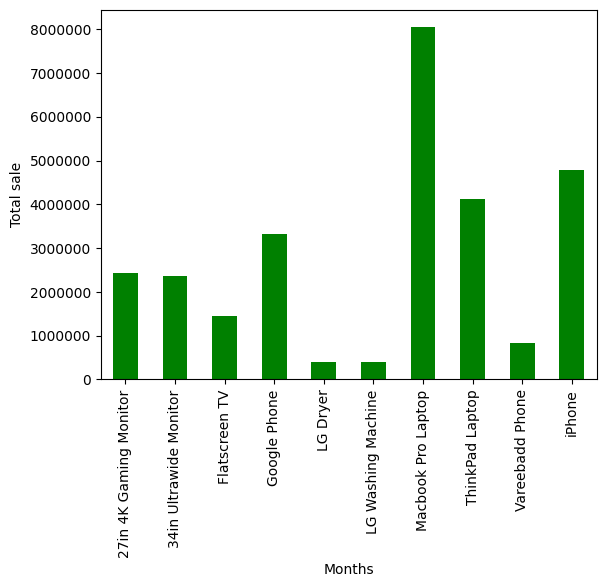

In [18]:
big_sale_df = combined_df[combined_df["Price Each"]> 184.4]
result = big_sale_df.groupby("Product")["Total_Sale"].sum()
total_sale_df = result.to_frame(name='Total_Sale')
total_sale_df["Product"]= total_sale_df.index
result.plot(kind = "bar", color = "green")
ax=result.plot.bar(x= "Months", y= "Total_Sale",
               color = "green")
ax.yaxis.set_major_formatter('{x:.0f}')
ax.set_xlabel("Months")
ax.set_ylabel("Total sale")
plt.show


First off, we have 10 items whose selling prices are higher than the average price of items sold at the store,
Even though the "Macbook Pro laptop" is not in particularly high demand, we can see that sales are still extremely impressive.

Note: The average of "Price Each" was gotten when we used the "described" function earlier on.


# Product sold at the same time

I needed to know what items went well together in this situation. To collect all the goods with duplicate "Order IDs," I used the "duplicates" function. Next, I used "," to unite the products with the same "Order ID" in a single row using "join".

In [20]:
duplicates= combined_df[combined_df["Order ID"].duplicated(keep = False)]

group = duplicates.groupby("Order ID")

result = group['Product'].apply(lambda x: ', '.join(x)).reset_index()
result.head(20)

,Order ID,Product
0,141275,"USB-C Charging Cable, Wired Headphones"
1,141290,"Apple Airpods Headphones, AA Batteries (4-pack)"
2,141365,"Vareebadd Phone, Wired Headphones"
3,141384,"Google Phone, USB-C Charging Cable"
4,141450,"Google Phone, Bose SoundSport Headphones"
5,141457,"iPhone, Apple Airpods Headphones"
6,141478,"Google Phone, Apple Airpods Headphones"
7,141550,"iPhone, Apple Airpods Headphones, Wired Headph..."
8,141587,"USB-C Charging Cable, Apple Airpods Headphones"
9,141645,"Lightning Charging Cable, Wired Headphones"


As would be expected, the buyer would also like to order a charging cord and headphones in addition to every phone ordered.

# Product with the highest demand

I just counted the "Quantity Ordered" for each "Product" in this case, then sort them in increasing order.

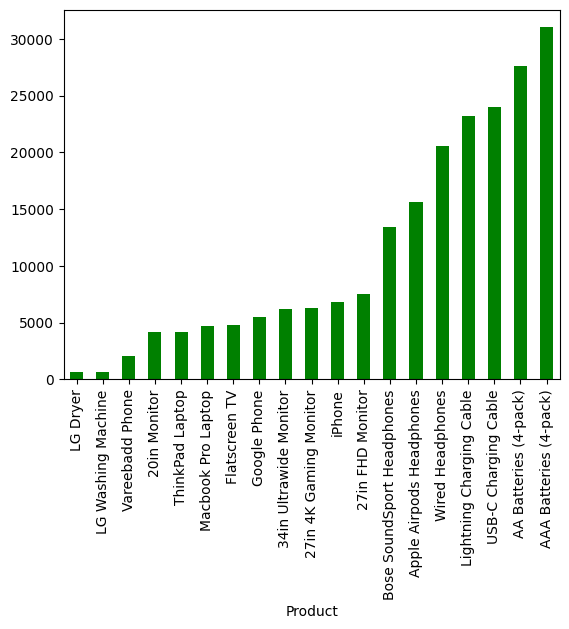

In [12]:

product_grp= combined_df.groupby("Product")["Quantity Ordered"].sum()
a= product_grp.sort_values()
a.plot(kind = "bar", color= "green")

plt.show()


According to the visualization below, "AAA Batteries" receive the highest level of client demand. In order to avoid disappointing our customers, we offer a platform where the best products are easily accessible.

DATA VISUALIZATION: 
In order to project certain information that I thought would appear better when displayed, I constructed a dashboard in Power BI. Because a dashboard makes it simple and quick for the store to examine crucial data, including revenue and operational performance, in one location.
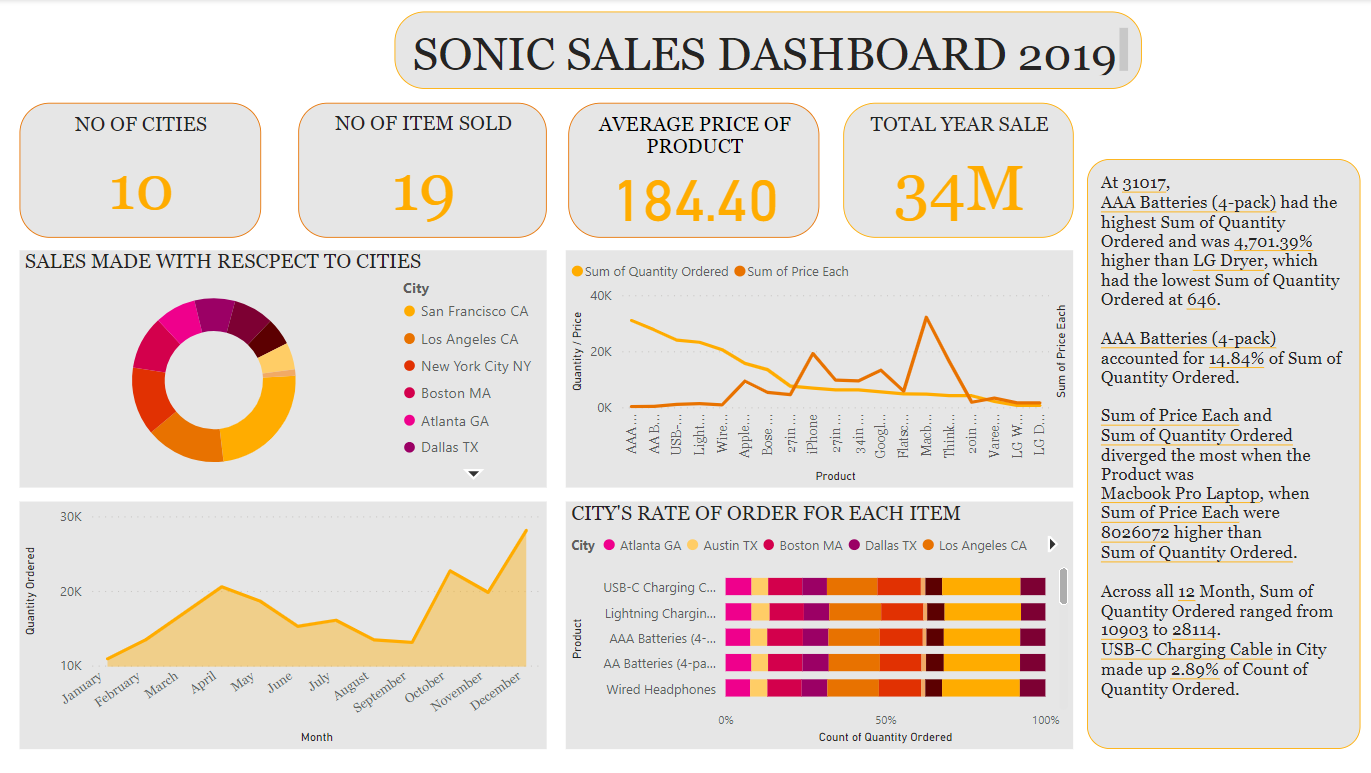


INSIGHTS:
-For most of the products, there is an inverse relationship between the product price and the quantity ordered.
-There are ten products whose prices are higher than the industry standard.
-The Macbook Pro laptop, which cost $1700, is the item with the highest price.
-With a total order of 646, the LG Dryer is the item with the lowest quantity ordered.
-Four products have ever been ordered concurrently, which is the most.
-The maximum quantity ordered for a single product is Nine.
-With a total order of 31017, the AAA Batteries (4-pack) are the item with the biggest quantity ordered, while being the least    expensive item on the list.

CONCLUSIONS:
In conclusion, performing a sales analysis is an essential first step for any company hoping to boost productivity and expand its success. Businesses can learn more about consumer behavior, market trends, and areas for development by examining sales data. The decisions and proactive actions that result from these insights can boost sales and profitability.

Thank you for reading through, connect with me on https://twitter.com/henzo_360